In [6]:
import pandas as pd
import datetime
%matplotlib inline

In [7]:
dba = pd.read_csv('/Users/Alex/Coding/weather_db/Data/dba.csv')

In [8]:
def get_date_object(date):
    return datetime.date(int(date[:4]), int(date[5:7]), int(date[8:]))

In [9]:
dba["month"] = dba.date.apply(lambda x: get_date_object(x).month)
dba["day_of_month"] = dba.date.apply(lambda x: get_date_object(x).day)

In [10]:
seg_dba_list = []
for region in dba.region.unique():
    seg_dba_list.append(dba[dba.region == region])

In [11]:
seg_dba_list[0];

In [12]:
seg_dba_list = [seg_dba.append(seg_dba, ignore_index=True) for seg_dba in seg_dba_list]

In [13]:
seg_dba_list[0].iloc[0];

In [14]:
for x in range(2,31,2):
    for seg_dba in seg_dba_list:
        seg_dba["rolling_normal_high_{}days".format(x)] = (
            seg_dba.normal_high.rolling(
                window=x,
                min_periods=1,
                center=True,
            )
            .mean()
            .round(1)
        )

In [15]:
seg_dba_list = [seg_dba.iloc[181:(181+365)] for seg_dba in seg_dba_list]

In [16]:
dba_rolled = pd.concat(seg_dba_list, ignore_index=True).drop(
    ["date", "province"], axis=1
)

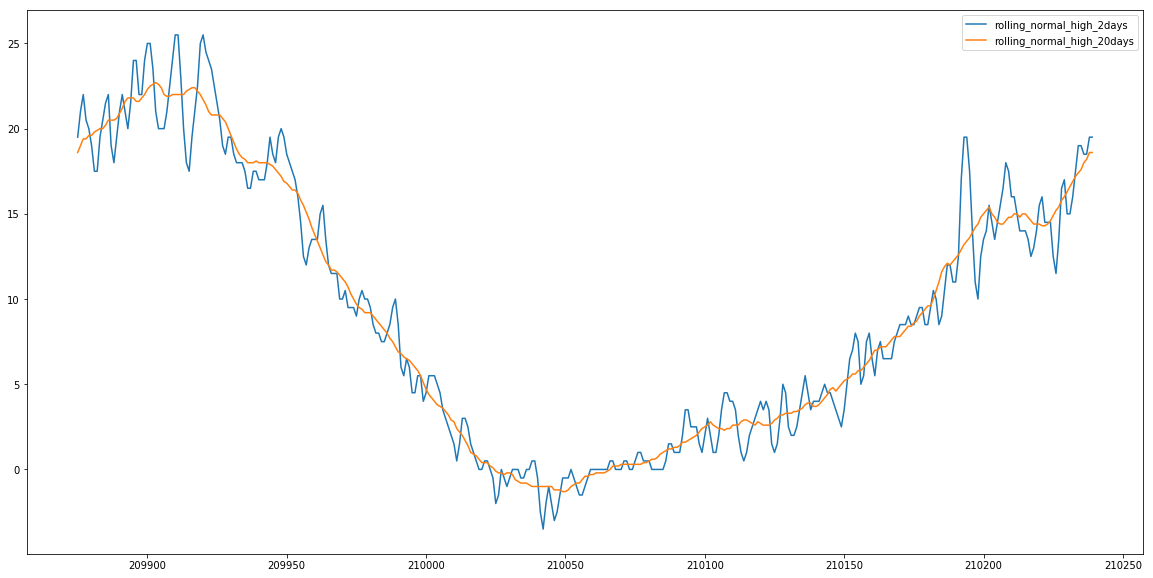

In [26]:
dba_rolled[dba_rolled.region=='Whistler'][['rolling_normal_high_2days', 'rolling_normal_high_20days', ]].plot(figsize=(20,10))

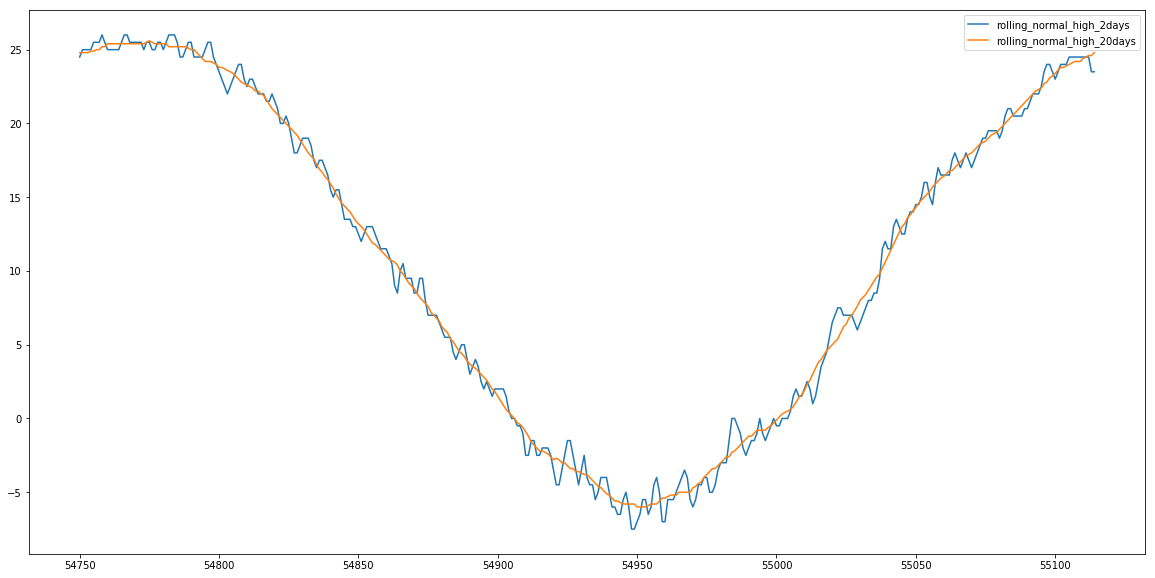

In [27]:
dba_rolled[dba_rolled.region=='Gatineau'][['rolling_normal_high_2days', 'rolling_normal_high_20days', ]].plot(figsize=(20,10))

In [28]:
#dba_rolled.to_csv('/Users/Alex/Coding/weather_db/Data/dba_rolled.csv')